In [1]:
import git.focus_stack_refinement.support_scripts as supp
import cv2 as cv
import numpy as np
import json
import codecs
import os
import re
import matplotlib.pyplot as plt
from scipy.signal import savgol_filter, find_peaks

In [2]:
with open('focus_stack_results_2.txt', 'r') as res:
    voll_focus_measurements = json.loads(res.readline())

In [3]:
with open('datasets/focus_stack_results_teng.txt') as res:
    teng_focus_measurements = json.loads(res.readline())

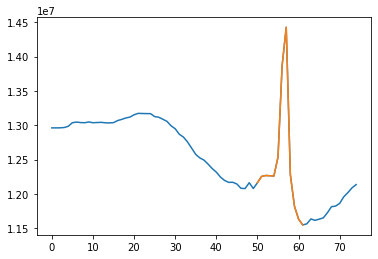

2020-12-02 16:34:18,928 : INFO : git.focus_stack_refinement.focus_filtering.post_filtering : Equality delta between img#56 and img#57: 2.606970
2020-12-02 16:34:18,930 : INFO : git.focus_stack_refinement.focus_filtering.post_filtering : 0 duplicates were found and deleted!
2020-12-02 16:34:18,931 : INFO : git.focus_stack_refinement.focus_filtering.post_filtering : Next blurred images were deleted: []


In [7]:
dataset_root_dir = r'datasets/VIDEOS-CARFULLY-EXTRACT/zip-files/4.04.2020/Earthworm/'
dataset_name = 'Earthworm fast'
voll_results = voll_focus_measurements['Earthworm fast']
teng_results = teng_focus_measurements['Earthworm fast']

found_segment_start, found_segment_end = supp.find_peak_v4_mirror(z_stack_measures=voll_results, focus_measure='VOLL4')
found_teng_peaks =  supp.get_classic_filtering_results(path_to_video=dataset_root_dir + 'fast.mp4', measurement_stack=teng_results)

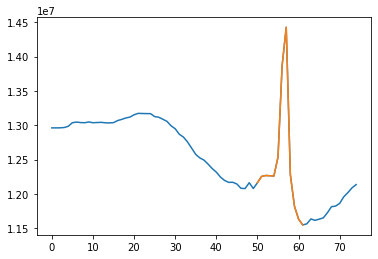

In [8]:
plt.plot(voll_results)
plt.plot(range(found_segment_start, found_segment_end), np.array(voll_results)[found_segment_start:found_segment_end])

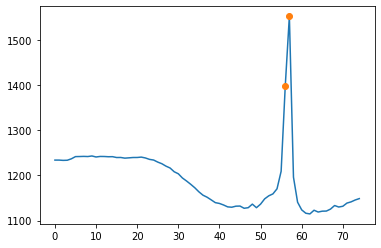

In [10]:
plt.plot(teng_results)
plt.plot(found_teng_peaks, np.array(teng_results)[found_teng_peaks], 'o')

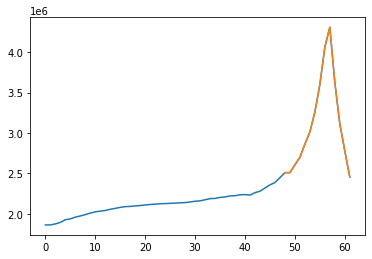

[48, 62]
datasets/VIDEOS-CARFULLY-EXTRACT/29.11.2020/Bee Wings 160x120_fast
2020-12-02 16:56:14,665 : INFO : git.focus_stack_refinement.focus_filtering.post_filtering : Equality delta between img#860 and img#861: 4.581369
2020-12-02 16:56:14,683 : INFO : git.focus_stack_refinement.focus_filtering.post_filtering : Equality delta between img#863 and img#864: 4.701434
2020-12-02 16:56:14,699 : INFO : git.focus_stack_refinement.focus_filtering.post_filtering : Equality delta between img#866 and img#867: 5.192195
2020-12-02 16:56:14,717 : INFO : git.focus_stack_refinement.focus_filtering.post_filtering : Equality delta between img#869 and img#870: 5.527921
2020-12-02 16:56:14,736 : INFO : git.focus_stack_refinement.focus_filtering.post_filtering : Equality delta between img#870 and img#871: 3.468893
2020-12-02 16:56:14,751 : INFO : git.focus_stack_refinement.focus_filtering.post_filtering : Equality delta between img#879 and img#880: 9.906882
2020-12-02 16:56:14,754 : INFO : git.focus_stack

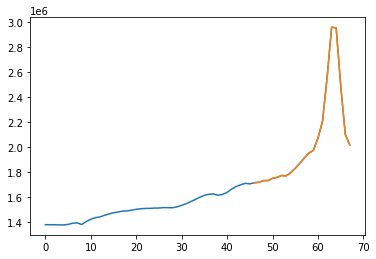

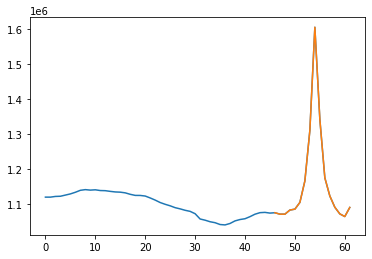

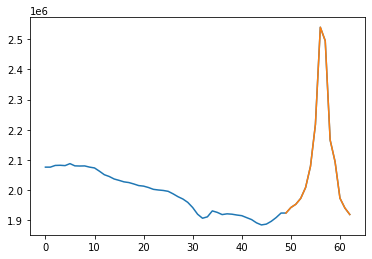

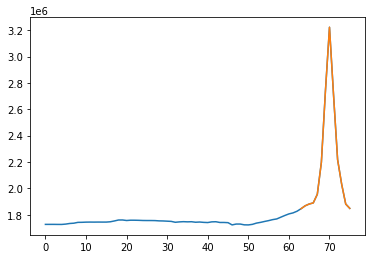

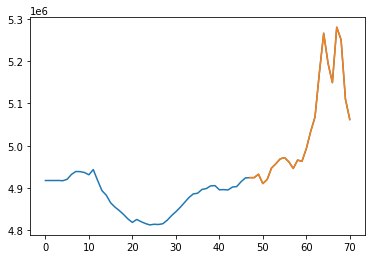

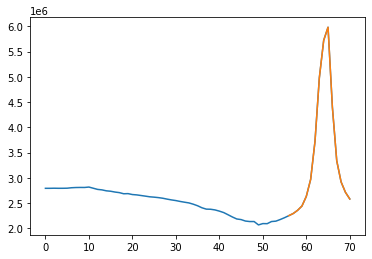

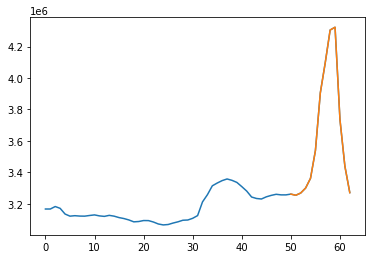

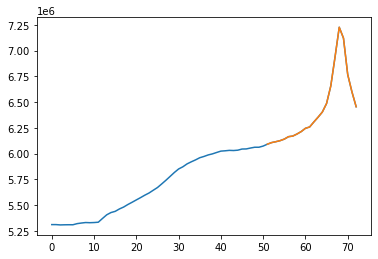

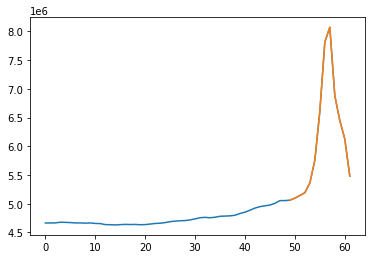

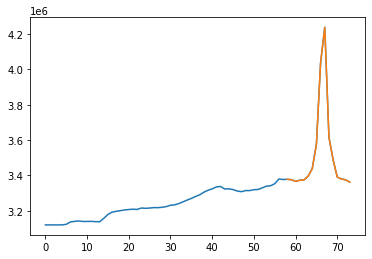

In [20]:
import json
import os
import re

voll_res = {}
teng_res = {}
# calculate focus maps for all videos:
path_to_zip_files = 'datasets/VIDEOS-CARFULLY-EXTRACT/29.11.2020/'
for dirpath, dirnames, filenames in os.walk(path_to_zip_files):
    if len(filenames) != 0:
        videos = list(filter(lambda x: (x[-3:] == 'mp4'), filenames))
        for video in videos:
            video_dir = dirpath + '/'
            video_path = video_dir + video
            video_name = video[0:-4]

            if re.search(r'super_slow', video_name) is not None:
                video_name = dirpath.split('\\')[-1] + ' ' + video_name
                if video_name not in teng_res:
                    teng_res[video_name] = supp.get_classic_filtering_results(path_to_video=video_path, parts=True)
                best_teng_frames = teng_res[video_name]
                print(best_teng_frames)

            if re.search(r'fast', video_name) is not None:
                video_name = dirpath.split('\\')[-1] + ' ' + video_name
                if video_name not in voll_res:
                    voll_res[video_name] = list(supp.find_peak_v4_mirror(path_to_video=video_path, focus_measure='VOLL4'))
                voll_interval = voll_res[video_name]
                print(voll_interval)

            print(video_name)


In [21]:
from git.focus_stack_refinement.focus_filtering.filter_image import filter_focused_images
path_to_zip_files = 'datasets/VIDEOS-CARFULLY-EXTRACT/29.11.2020/'
teng_parts_f_res = {}
for dirpath, dirnames, filenames in os.walk(path_to_zip_files):
    if len(filenames) != 0:
        videos = list(filter(lambda x: (x[-3:] == 'mp4'), filenames))
        for video in videos:
            video_dir = dirpath + '/'
            video_path = video_dir + video
            video_name = video[0:-4]

            if re.search(r'super_slow', video_name) is not None:
                video_name = dirpath.split('\\')[-1] + ' ' + video_name
                if video_name not in teng_parts_f_res:
                    stack = supp.get_frames_as_array(video_path)
                    teng_parts_f_res[video_name] = filter_focused_images(stack, 'TENG', True, count=8)


            print(video_name)

160x120_fast
2020-12-02 20:03:46,824 : INFO : git.focus_stack_refinement.focus_filtering.post_filtering : Equality delta between img#860 and img#861: 4.581369
2020-12-02 20:03:46,846 : INFO : git.focus_stack_refinement.focus_filtering.post_filtering : Equality delta between img#863 and img#864: 4.701434
2020-12-02 20:03:46,869 : INFO : git.focus_stack_refinement.focus_filtering.post_filtering : Equality delta between img#866 and img#867: 5.192195
2020-12-02 20:03:46,894 : INFO : git.focus_stack_refinement.focus_filtering.post_filtering : Equality delta between img#869 and img#870: 5.527921
2020-12-02 20:03:46,915 : INFO : git.focus_stack_refinement.focus_filtering.post_filtering : Equality delta between img#870 and img#871: 3.468893
2020-12-02 20:03:46,942 : INFO : git.focus_stack_refinement.focus_filtering.post_filtering : Equality delta between img#879 and img#880: 9.906882
2020-12-02 20:03:46,946 : INFO : git.focus_stack_refinement.focus_filtering.post_filtering : 0 duplicates were 

In [22]:
def convert(o):
    if isinstance(o, np.int32): return int(o)
    raise TypeError

with codecs.open('datasets/focus_stack_results_teng_parts_new.txt', 'w', encoding='utf-8') as results:
    results.writelines(json.dumps(teng_parts_f_res, default=convert))

In [ ]:
voll_res = {}

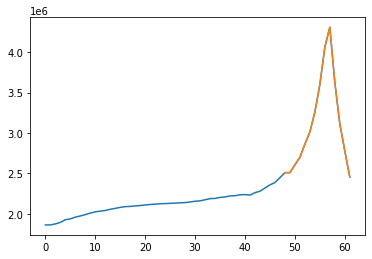

[0.77419355 1.        ]
160x120_fast
[0.87018256 0.87322515 0.87626775 0.87931034 0.88235294 0.88336714
 0.89249493]
[0.77419355 1.        ]
1920x1080_super_slow
[0.67647059 1.        ]
160x120_fast
[0.88692946 0.89004149 0.89315353 0.8973029  0.90041494 0.90352697
 0.90456432 0.906639   0.91078838 0.91390041 0.91701245]
[0.67647059 1.        ]
1920x1080_super_slow
[0.74193548 1.        ]
160x120_fast
[0.83979592 0.84285714 0.84387755 0.84591837 0.84693878]
[0.74193548 1.        ]
1920x1080_super_slow
[0.77777778 1.        ]
160x120_fast
[0.83401222 0.83503055 0.83706721 0.83808554]
[0.77777778 1.        ]
1920x1080_super_slow
[0.82894737 1.        ]
160x120_fast
[0.88211382 0.88821138 0.89126016 0.89227642 0.8953252  0.89837398
 0.90142276 0.90345528 0.90752033]
[0.82894737 1.        ]
1920x1080_super_slow
[0.66197183 1.        ]
160x120_fast
[0.8622449  0.86938776 0.87959184 0.88265306 0.88571429 0.88979592
 0.89285714 0.90306122]
[0.66197183 1.        ]
1920x1080_super_slow
[0.78873

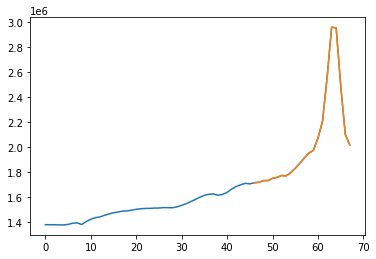

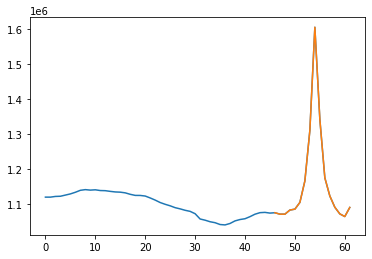

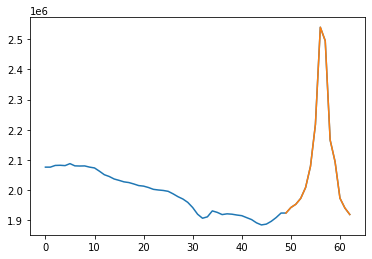

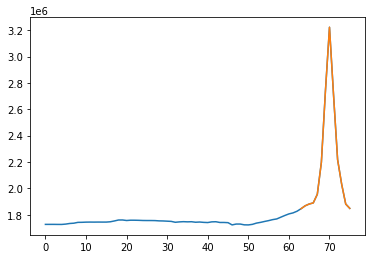

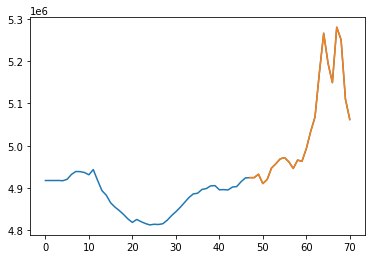

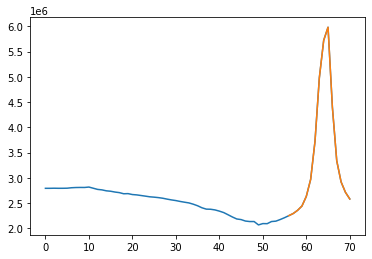

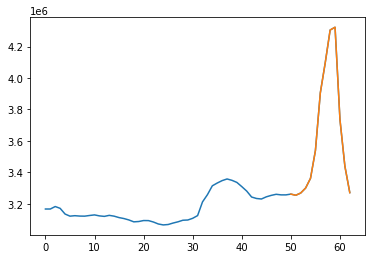

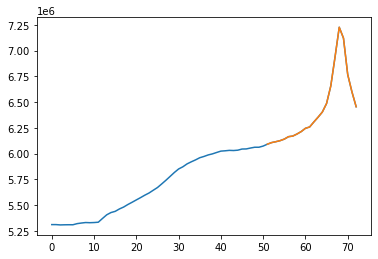

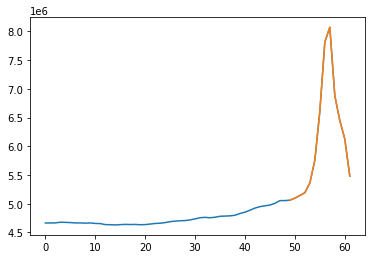

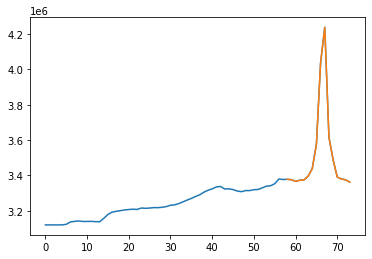

In [15]:
with open('datasets/focus_stack_results_teng_parts_new.txt') as res:
    teng_res = json.loads(res.readline())
path_to_zip_files = 'datasets/VIDEOS-CARFULLY-EXTRACT/29.11.2020/'
for dirpath, dirnames, filenames in os.walk(path_to_zip_files):
    if len(filenames) != 0:
        videos = list(filter(lambda x: (x[-3:] == 'mp4'), filenames))
        for video in videos:
            video_dir = dirpath + '/'
            video_path = video_dir + video
            video_file_name = video[0:-4]

            if re.search(r'fast', video_file_name) is not None:
                video_title = dirpath.split('/')[-1]
                if video_title not in voll_res:
                    voll_res[video_title] = list(supp.find_peak_v4_mirror(path_to_video=video_path, focus_measure='VOLL4'))
                vidcap = cv.VideoCapture(video_path)
                voll_interval = np.array(voll_res[video_title]) / int(vidcap.get(cv.CAP_PROP_FRAME_COUNT))
                voll_res[video_title] = voll_interval
                print(voll_interval)
            if re.search(r'super_slow', video_file_name) is not None:
                video_title = dirpath.split('/')[-1]
                if video_title not in teng_res:
                    print('Bad stuff')
                vidcap = cv.VideoCapture(video_path)
                teng_peaks = np.array(teng_res[video_title]) / int(vidcap.get(cv.CAP_PROP_FRAME_COUNT))

                print(teng_peaks)
                print(voll_res[video_title])

            print(video_file_name)

In [4]:
from time import time

def validate_results(high_res_video_path, low_res_video_path):
    h_r_stack = supp.get_frames_as_array(high_res_video_path)
    l_r_stack = supp.get_frames_as_array(low_res_video_path)

    time_res = []
    start_time = time()
    teng_parts_res = supp.filter_focused_images(h_r_stack, 'TENG', parts=True)
    delta = time() - start_time
    time_res.append(delta)

    start_time = time()
    voll_segment = supp.find_peak_v4_mirror(z_stack=l_r_stack, focus_measure='VOLL4', filter_window=5, does_plotting=False)
    voll_segment_relative_values = np.array(voll_segment) / len(l_r_stack)
    delta = time() - start_time

    segment_start = int(len(h_r_stack) * voll_segment_relative_values[0])
    segment_end = int(len(h_r_stack) * voll_segment_relative_values[1])
    h_r_refined = h_r_stack[segment_start:segment_end]

    start_time = time()
    teng_parts_res_with_refinement = supp.filter_focused_images(h_r_refined, 'TENG', parts=True)
    delta = time() - start_time + delta
    time_res.append(delta)
    #%%
    print(time_res)
    print(teng_parts_res)
    print(np.array(teng_parts_res_with_refinement) + segment_start)
    print(segment_end - segment_start)
    print(len(h_r_stack))


In [10]:
path_to_zip_files = 'datasets/VIDEOS-CARFULLY-EXTRACT/10.12.2020/'
for dirpath, dirnames, filenames in os.walk(path_to_zip_files):
    if len(filenames) != 0:
        videos = list(filter(lambda x: (x[-3:] == 'mp4'), filenames))
        for video in videos:
            video_dir = dirpath + '/'
            video_path = video_dir + video
            video_file_name = video[0:-4]

            if re.search(r'fast', video_file_name) is not None:
                voll_video_path = video_path
            if re.search(r'super_slow', video_file_name) is not None:
                teng_video_path = video_path
                print(video_dir.split('/')[-2])
                validate_results(teng_video_path, voll_video_path)


Ascaris female
Ascaris female
Ascaris female
Butterfly mouth parts
Butterfly mouth parts
Butterfly mouth parts
Butterfly scales
Butterfly scales
Butterfly scales
Earthworm
Earthworm
Earthworm
Fowl feather
Fowl feather
Fowl feather
Goldfish scale
Goldfish scale
Goldfish scale
Honeybee leg
Honeybee leg
Honeybee leg
Hydra c.s
Hydra c.s
Hydra c.s
Hydra l.s
Hydra l.s
Hydra l.s
Locust mouth parts
Locust mouth parts
Locust mouth parts
Артерия
Артерия
Артерия
Гладкие мышцы
Гладкие мышцы
Гладкие мышцы
Кровь лягушки
Кровь лягушки
Кровь лягушки
Кровь человека
Кровь человека
Кровь человека
Легкие
Легкие
Легкие
Лимфатический узел
Лимфатический узел
Лимфатический узел
Мерцательный эпителий
Мерцательный эпителий
Мерцательный эпителий
Митоз в клетках кончика корешка лука
Митоз в клетках кончика корешка лука
Митоз в клетках кончика корешка лука
Поперечный разрез листа
Поперечный разрез листа
Поперечный разрез листа
Пыльник лилии
Пыльник лилии
Пыльник лилии
Пыльца лилии
Пыльца лилии
Пыльца лилии
Пыльца 

In [ ]:
values = []
path_to_zip_files = 'datasets/VIDEOS-CARFULLY-EXTRACT/29.11.2020/'
for dirpath, dirnames, filenames in os.walk(path_to_zip_files):
    if len(filenames) != 0:
        videos = list(filter(lambda x: (x[-3:] == 'mp4'), filenames))
        for video in videos:
            video_dir = dirpath + '/'
            video_path = video_dir + video
            video_file_name = video[0:-4]

            if re.search(r'fast', video_file_name) is not None:
                voll_video_path = video_path
                l_r_stack = supp.get_frames_as_array(video_path)
                voll_segment = supp.find_peak_v4_mirror(z_stack=l_r_stack, focus_measure='VOLL4', filter_window=5, does_plotting=False)
                voll_segment_part_coeff = (voll_segment[1] - voll_segment[0]) / len(l_r_stack)
                print(video_file_name)
                values.append(voll_segment_part_coeff)

In [10]:
values = np.array(values)
values_mean = np.mean(values)
print(1/values_mean)

6.986653725559611


In [9]:
print(1/ np.array(values))

[5.63636364 6.8        7.75       7.875      9.5        5.91666667
 7.1        6.3        6.63636364 6.2        9.25      ]


In [3]:
from time import time
high_res_video_path = 'datasets/VIDEOS-CARFULLY-EXTRACT/Image from iOS.MOV'

h_r_stack = supp.get_frames_as_array(high_res_video_path)
l_r_stack = h_r_stack

time_res = []
start_time = time()
teng_parts_res = supp.filter_focused_images(h_r_stack, 'TENG', parts=True)
delta = time() - start_time
time_res.append(delta)

start_time = time()
voll_segment = supp.find_peak_v4_mirror(z_stack=l_r_stack, focus_measure='VOLL4', filter_window=5, output_plot_name='_new')
voll_segment_relative_values = np.array(voll_segment) / len(l_r_stack)
delta = time() - start_time

segment_start = int(len(h_r_stack) * voll_segment_relative_values[0])
segment_end = int(len(h_r_stack) * voll_segment_relative_values[1])
h_r_refined = h_r_stack[segment_start:segment_end]

start_time = time()
teng_parts_res_with_refinement = supp.filter_focused_images(h_r_refined, 'TENG', parts=True)
delta = time() - start_time + delta
time_res.append(delta)

print(time_res)
print(teng_parts_res)
print(np.array(teng_parts_res_with_refinement) + segment_start)

2020-12-11 18:01:38,442 : INFO : git.focus_stack_refinement.focus_filtering.post_filtering : Equality delta between img#756 and img#757: 34.647802
2020-12-11 18:01:38,548 : INFO : git.focus_stack_refinement.focus_filtering.post_filtering : Equality delta between img#760 and img#761: 5.980311
2020-12-11 18:01:38,568 : INFO : git.focus_stack_refinement.focus_filtering.post_filtering : Equality delta between img#1284 and img#1285: 17.352615
2020-12-11 18:01:38,592 : INFO : git.focus_stack_refinement.focus_filtering.post_filtering : Equality delta between img#1308 and img#1309: 4.945800
2020-12-11 18:01:38,614 : INFO : git.focus_stack_refinement.focus_filtering.post_filtering : Equality delta between img#1792 and img#1793: 28.003270
2020-12-11 18:01:38,637 : INFO : git.focus_stack_refinement.focus_filtering.post_filtering : Equality delta between img#1952 and img#1953: 6.487598
2020-12-11 18:01:38,659 : INFO : git.focus_stack_refinement.focus_filtering.post_filtering : Equality delta betwe

D:\_MEL_Science\git\experiments\objective_functions.py:113: RuntimeWarning: overflow encountered in long_scalars
  return sum1 - sum2


In [2]:
supp.extract_specific_frames('datasets/VIDEOS-CARFULLY-EXTRACT/Image from iOS.MOV', path_out='datasets/12.11_PURE_TENG/', frame_indices=[757, 761, 1285, 1309])

In [3]:
supp.extract_specific_frames('datasets/VIDEOS-CARFULLY-EXTRACT/Image from iOS.MOV', path_out='datasets/12.11_FIND_SEG_AND_TENG/', frame_indices=[1285, 1289, 1309, 1321])





